# Networks

Networks are another important data structure in transportaiton.  Think roadway networks in particular, but many things can be represented as a network.  We'll go over a few basics in class. 

MPOs or DOTs with a travel model will maintain a network representation of the street network for use in the model.  This will have the attributes the model needs: free flow speed, capacity, length, directionality, turn restrictions, facility type, etc.  Usually, the best way to get a copy is to call up your friendly local transportation modler and ask.  Even in this tech-crazy world, it is amazing how far asking politely will get you...

...however, that's not what we're going to do here.  Instead, we are going to work with network data from OpenStreetMap: 

http://www.openstreetmap.org/

To make it easier, we will work with a package called OSMnx, by Geoff Boeing. You can read a paper on the toolkit here: 

https://www.researchgate.net/publication/309738462_OSMNX_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks

And a blog post here: 

http://geoffboeing.com/2016/11/osmnx-python-street-networks/


### Homework

Your homework is to: 

1. Read the network paper linked above. 

2. Use the blog post to figure out how to install and use the package. 

3. Get the street network for Lexington.  

4. Print the basic_stats for the network. 

5. Calculate and show the shortest path from your home (or another point of interest) to UK campus.  Is this the route you would take?  What is the same or different?

6. Repeat step 5 for three other trips that you make regularly.  

 

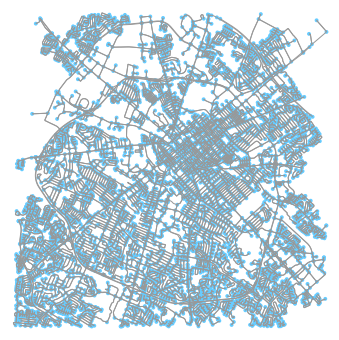

(<matplotlib.figure.Figure at 0x1f8c376a160>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f8c3c1dc18>)

In [27]:
#Street network of Lexington (Within or Close to New Circle)
%matplotlib inline
L = ox.graph_from_point((38.0406, -84.5037), distance=6500, network_type='drive')
ox.plot_graph(L)

In [28]:
#Basic stats for the Above Network
import pprint
pp = pprint.PrettyPrinter()
basic_stats = ox.basic_stats(L)
pp.pprint(basic_stats)

{'circuity_avg': 1.076443049972934,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None,
 'edge_density_km': None,
 'edge_length_avg': 149.32036506307736,
 'edge_length_total': 2473790.4880000027,
 'intersection_count': 5201,
 'intersection_density_km': None,
 'k_avg': 4.945373134328358,
 'm': 16567,
 'n': 6700,
 'node_density_km': None,
 'self_loop_proportion': 0.008631617070079072,
 'street_density_km': None,
 'street_length_avg': 151.9295758527336,
 'street_length_total': 1403069.6329999948,
 'street_segments_count': 9235,
 'streets_per_node_avg': 2.7561194029850746,
 'streets_per_node_counts': {0: 0,
                             1: 1499,
                             2: 33,
                             3: 3799,
                             4: 1342,
                             5: 26,
                             6: 1},
 'streets_per_node_proportion': {0: 0.0,
                                 1: 0.2237313432835821,
                                 2: 0.004925373

In [32]:
#Shortest Path from Home to UK Campus
#Defining lat/long for home and UK
Home = (37.988463, -84.496733)
UK_Campus = (38.040467, -84.508426)
origin_node = ox.get_nearest_node(L, Home)
destination_node = ox.get_nearest_node(L, UK_Campus)
origin_node, destination_node

(163476535, 163476046)

In [33]:
#Determining which nodes are on the shortest route
import networkx as nx
route = nx.shortest_path(L, origin_node, destination_node, weight='length')
str(route)

'[163476535, 163476441, 163476470, 163476434, 163472452, 163412427, 163411316, 163411656, 163481823, 4076148252, 163543260, 3415942431, 163480456, 3415942429, 163451921, 163451983, 3415942419, 163453988, 163520658, 3415942421, 3415942423, 163543276, 163448629, 163543287, 3415942425, 163543296, 3389609858, 163543490, 163567895, 3689969259, 3689968574, 3689968584, 3689968606, 3689968534, 3689968535, 3689968543, 3689968544, 3689968527, 163567981, 163585733, 163579488, 4005107619, 4005107620, 163454845, 163446212, 163565489, 163525748, 163430298, 163579958, 163430011, 163581196, 163505416, 163568242, 163454416, 163476055, 163581184, 163572339, 163476046]'

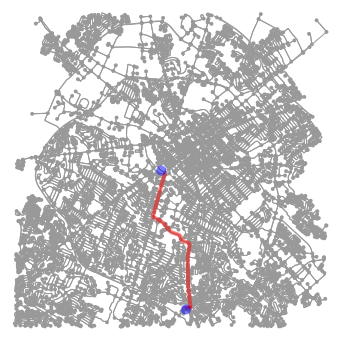

In [34]:
#Plotting the shortest route on the graph
fig, ax = ox.plot_graph_route(L, route, origin_point=Home, destination_point=UK_Campus)

In [35]:
#This is the route I take to come to Campus. It goes up Tate's Creek, has me turn on Alumni, and then has me turn on Limestone. 
#So in this case, the shortest route is actually the route I take.

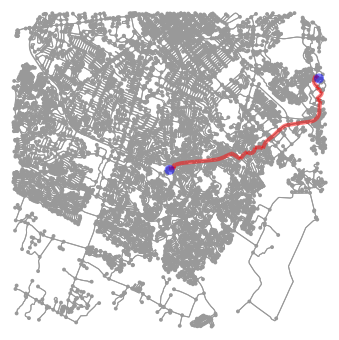

In [98]:
#From Home to Regal Cinemas at Hamburg
HH = ox.graph_from_point((37.988463, -84.496733), distance=7000, network_type='drive')
Home = (37.988463, -84.496733)
Hamburg = (38.025220, -84.420561)
orig_node = ox.get_nearest_node(HH, Home)
dest_node = ox.get_nearest_node(HH, Hamburg)
route = nx.shortest_path(HH, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(HH, route, origin_point=Home, destination_point=Hamburg)
#I normally take a different route than this, but I do use New Circle for a portion of it like this route does.

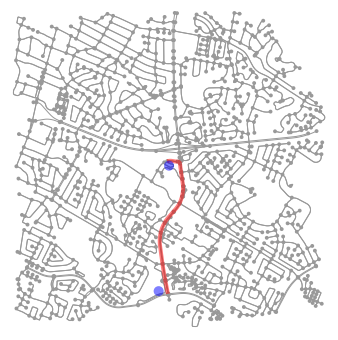

In [97]:
#From Home to Kroger
HK = ox.graph_from_point((37.988463, -84.496733), distance=2500, network_type='drive')
Home = (37.988463, -84.496733)
Kroger = (37.970104, -84.498665)
org_node = ox.get_nearest_node(HK, Home)
des_node = ox.get_nearest_node(HK, Kroger)
route = nx.shortest_path(HK, org_node, des_node, weight='length')
fig, ax = ox.plot_graph_route(HK, route, origin_point=Home, destination_point=Kroger)
#Normally go a longer way than this to avoid traffic on Tate's Creek

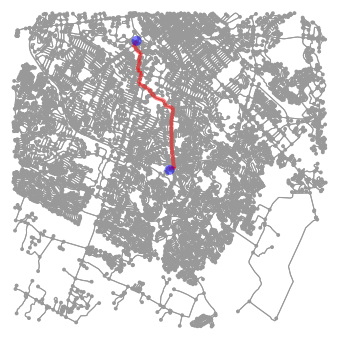

In [96]:
#From Home to Cookout
HC = ox.graph_from_point((37.988463, -84.496733), distance=7000, network_type='drive')
Home = (37.988463, -84.496733)
Cookout = (38.040321, -84.513584)
o_node = ox.get_nearest_node(HC, Home)
d_node = ox.get_nearest_node(HC, Cookout)
route = nx.shortest_path(HC, o_node, d_node, weight='length')
fig, ax = ox.plot_graph_route(HC, route, origin_point=Home, destination_point=Cookout)
#THis is typically the route I take